# HW8 - wstępna analiza eksploracyjna danych

## Mateusz Borowski

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Wczytanie i wstępne zapoznanie się z danymi

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Sprawdzenie typów kolumn

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Sprawdzenie ewentualnych braków w danych

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Koleracja zmiennych

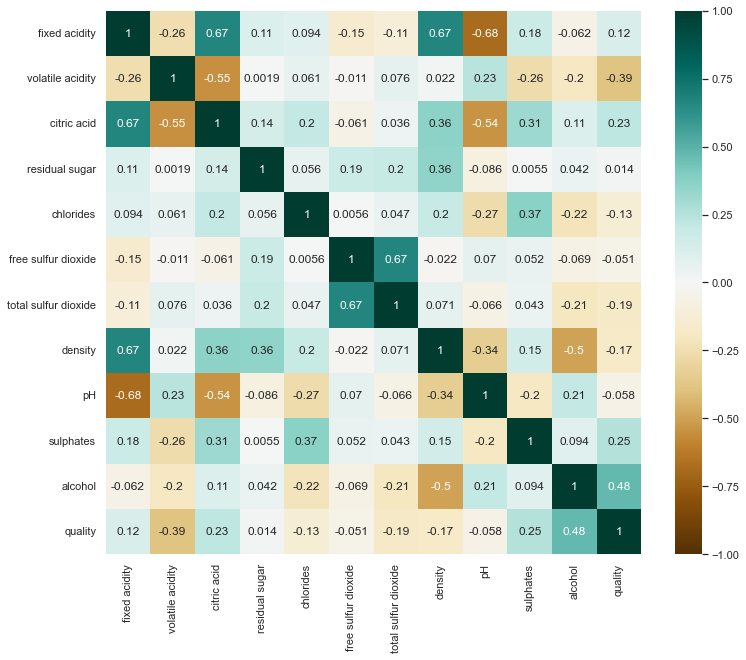

In [6]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

In [7]:
df.corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

Z jakością wina najbardziej korelują kolumny `alcohol`, `volatile acidity`, `sulphates`, `citric acid`

In [8]:
df.corr().loc['quality', ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']].sort_values(ascending=False)

alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

Kolumny `alcohol`, `sulphates` i `citric acid` pozytywnie wpływają na jakość wina, natomiast kolumna `volatile acidity` wpływa negatywnie

Przyjrzyjmy się dokładniej wcześniej wyróżnionym kolumnom

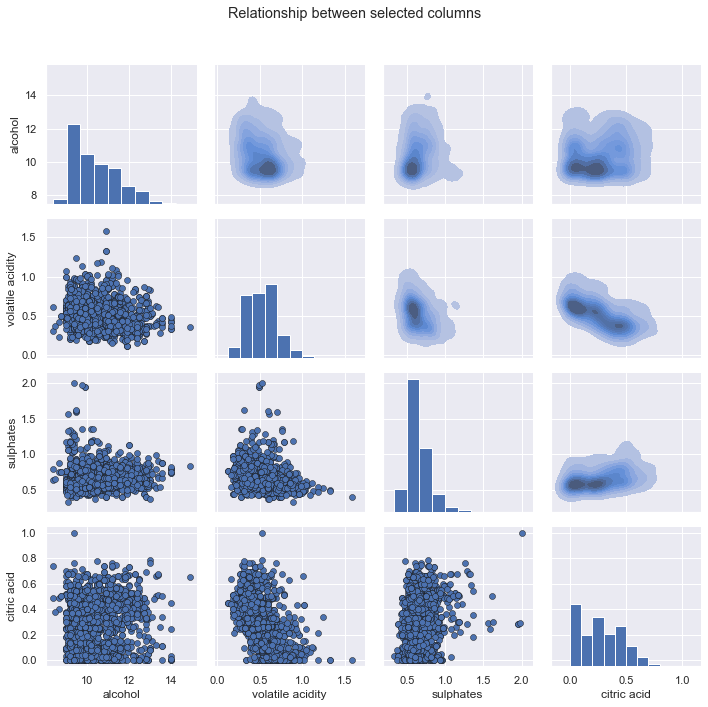

In [9]:
grid = sns.PairGrid(df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']])
grid = grid.map_upper(sns.kdeplot, fill=True, thresh=0.05)
grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.scatterplot, edgecolor='k')

grid.fig.tight_layout()
grid.fig.suptitle('Relationship between selected columns')
plt.subplots_adjust(top=0.9)

Z powyższej siatki wykresów, możemy zauważyć, że kolumny `citric acid` i `volatile acidity` są powiązane - w miarę jak rośnie jedna, maleje druga

In [10]:
df.corr().loc['citric acid', 'volatile acidity']

-0.5524956845595799

Jak widać powyżej, w istocie te dwie kolumny są dosyć silnie skorelowane

### Rozkład kolumn w zależności od jakości wina

In [11]:
facet_grid_df = pd.melt(df, id_vars=['quality'], value_vars=df.columns[:11], var_name='variable', value_name='value')
facet_grid_df.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
facet_grid_df.reset_index(drop=True, inplace=True)
facet_grid_df['quality'] = facet_grid_df['quality'].astype('category')

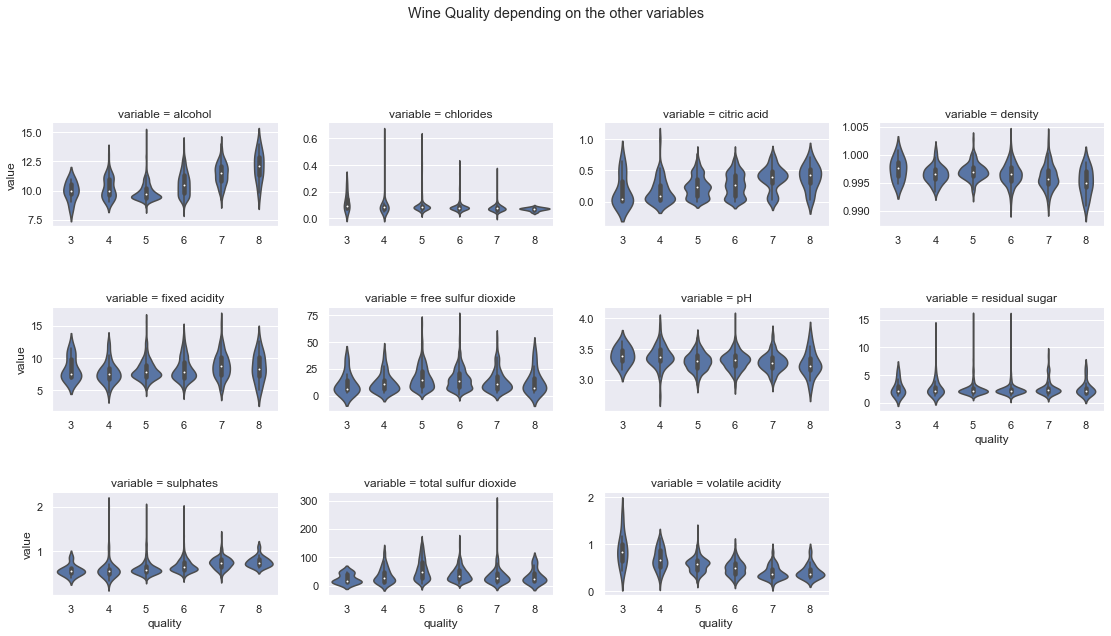

In [12]:
grid = sns.FacetGrid(facet_grid_df, col='variable', col_wrap=4, 
                    sharey=False, sharex=False, height=3, aspect=1.3)
grid.map(sns.violinplot, 'quality', 'value', order=[3, 4, 5, 6, 7, 8])

grid.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
grid.fig.suptitle('Wine Quality depending on the other variables')
plt.show()

Na powyższych wykresach możemy zaobserwować, że: 
- faktycznie wraz ze wzrostem zawartości alkoholu, jakość wina się podnosi
- tak jak wcześniej zauważyliśmy - wysoka wartość w kolumnie `citric acid` łączy się z winem lepszej jakości, jednak sporo win niskiej jakości również posiada wysoką zawartość kwasu cytrynowego
- ponownie potwierdzają się wnioski wskazujące, że wysoka wartość w kolumnie `sulphates` odpowiada dobrym winom, jednak warto zauważyć, że występują tutaj outlierzy - pojedyncze wina średniej jakości o wysokiej zawartości siarczanów
- potwierdzają się wnioski na temat kolumny `volatile acidity`
- wraz spadkiem wartości `pH` oraz `density` wrazsta jakość wina - widzieliśmy to już analizując korelację tych zeminnych z jakością, jednak współczynnik korelacji tych zmiennych był niższy, niż w przypadku wyróżnionych kolumn
- wartość kolumny `residual sugar` nie ma wpływu na jakość wina

### Podsumowanie

- wina lepszej jakości cechują się większą zawartością alkoholu, siarczanów, kwasu cytrynowego, a związana z nim aktywność lotna maleje
- dodatkowo wina lepszej jakości cechują się niższym poziomem pH oraz mniejszą gęstością